In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Loading and preprocessing Dataset

In [2]:
df = pd.read_csv("data/SeoulBikeData.csv")
df = df.drop(["Date", "Holiday", "Seasons"], axis=1)
cols = [
    "bike_count", "hour", "temp",
    "humidity","wind", "visibility",
    "dew_pt_temp", "radiation", "rain",
    "snow", "functional",
]
df.columns = cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop("hour", axis=1)
df = df.drop(["wind", "visibility", "functional"], axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


## Train, Test, Valid Split

In [4]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

def get_xy(dataframe: pd.DataFrame, y_label, x_labels=None):
    dataframe = dataframe.copy()
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

print(train.shape)
print(valid.shape)
print(test.shape)

(219, 7)
(73, 7)
(73, 7)


## Simple linear regression

In [5]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_valid_temp, y_valid_temp = get_xy(valid, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])
print(X_train_temp.shape)
print(y_train_temp.shape)

(219, 1)
(219, 1)


### Linear regression model

In [7]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

### The result of R^2 score

In [8]:
print(temp_reg.score(X_test_temp, y_test_temp))

0.311041947032876


### Plot the predicted line

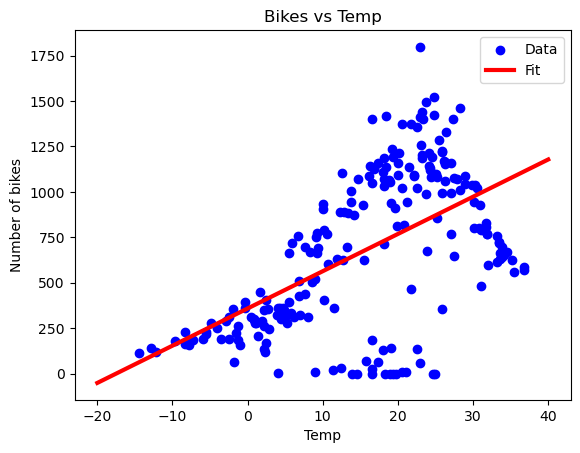

In [9]:
x = np.linspace(-20, 40, 100)
y = temp_reg.predict(x.reshape(-1, 1))
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
plt.plot(x, y, label="Fit", color="red", linewidth=3)
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("Number of bikes")
plt.legend()
plt.show()